## Exercise 1
## Example 1.1 Loading images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('graffiti.png')

## convert the image into a gray scale
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

## get the size of the image
rows,cols=img.shape[:2]
print('Rows ',rows,' Columns',cols)

Rows  640  Columns 800


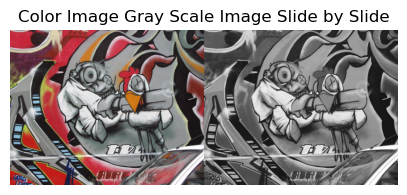

In [2]:
## Step 4: convert the gray scale image into 3 Channels (R/G/B) by stacking the gray scale image
gray_img_3channel=cv2.merge([gray_img,gray_img,gray_img])

## Step 5: Concatenate the original color iamge and the grayscale 3-channel image horizontally
combined_img= np.concatenate((img,gray_img_3channel),axis=1)

## Step 6: Display the final combined image:
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(combined_img,cv2.COLOR_BGR2RGB)) ## convert the BGR to RGB to display with matplotlib
plt.title('Color Image Gray Scale Image Slide by Slide')
plt.axis('off')
plt.show()

## Exercise 1.2 Image processing experiments
**Change of color spaces (HSV, LAB, YUV):**

- **RGB**: the standard color space, where colors are represented by red (R), Green (G), and Blue (B)
- **HSV** (Hue, Saturation, Value):
      - **Hue (H):** Represent the color type, it is measured in degrees ( 0 degree to 360 degree ) and it refers to the angle in the color wheel.
      - **Saturation (S):** Vibrancy of the color, ranging from 0 to 100% (full color).
      - **Value (V):** Brightness of the color ranging from 0 black to 100% (full brightness)
- **LAB (Lightness, A,B)**:
      - **Lightness (L)**: Lightness component, ranging from 0 (black) to 100(white)
      - **A:** Green-red component. Negative values indicate green, and positive values indicate red
      - **B:** Blue-yellow component. Negative values indicate blue, and positive values indicate yellow.
- **YUV(Luma, Chrominance-U, Chrominance-V):**
      - Y (Luma): Represents brightness (similar to grayscale).
      - U and V (Chrominance): Represent color information. U indicates the blue projection, and V indicates the red projection. Together, they describe the chromaticity of the image.

In [14]:
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lab_img = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
yuv_img = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)

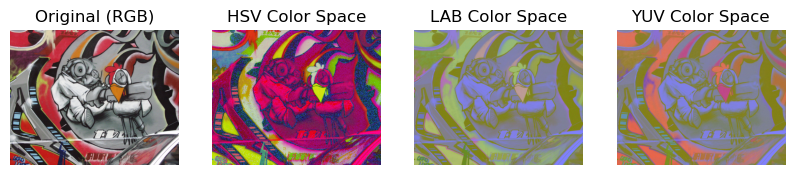

In [15]:
def display_images(image,title):
    plt.figure(figsize=(10,5))
    for i, (image,title) in enumerate(zip(image,title)):
        plt.subplot(1, len(images), i + 1)
        if len(image.shape) == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display the original and color space-converted images
images = [img, hsv_img, lab_img, yuv_img]
titles = ['Original (RGB)', 'HSV Color Space', 'LAB Color Space', 'YUV Color Space']

display_images(images, titles)

## Adaptive thresholding in the variants Gaussian and Otsu-Thresholding.

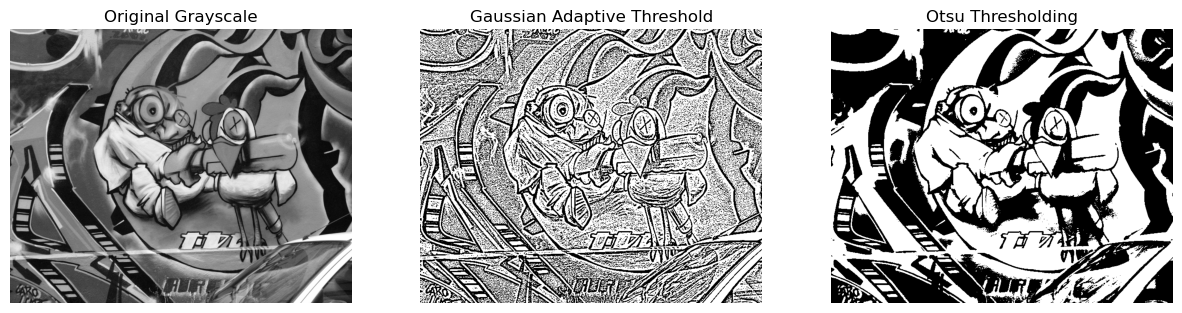

In [16]:

# Step 3: Apply Gaussian Adaptive Thresholding
gaussian_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Step 4: Apply Otsu's Thresholding (on grayscale image)
_, otsu_thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 5: Display the images
def display_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        if len(image.shape) == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
        plt.title(title)
        plt.axis('off')
    plt.show()

# Step 6: Display Original, Gaussian Threshold, and Otsu Threshold images
images = [gray_img, gaussian_thresh, otsu_thresh]
titles = ['Original Grayscale', 'Gaussian Adaptive Threshold', 'Otsu Thresholding']

display_images(images, titles)


## Canny edge extraction

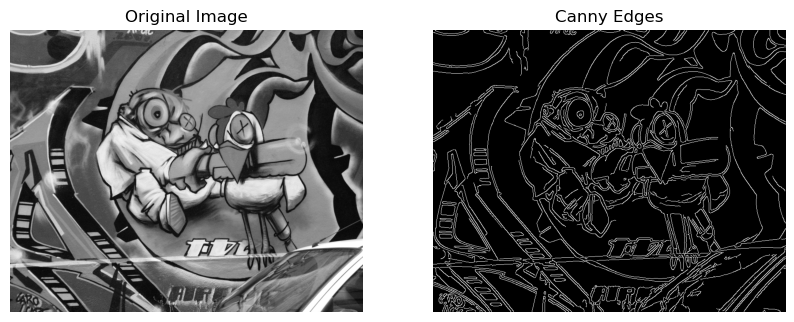

In [17]:
blurred_img=cv2.GaussianBlur(gray_img,(5,5),1.4)
low_threshold=50
high_threshold=150
edges=cv2.Canny(blurred_img,low_threshold,high_threshold)

# Step 4: Display the original image and the edges
def display_images(images, titles):
    plt.figure(figsize=(10, 5))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display the original and edge-detected images
images = [gray_img, edges]
titles = ['Original Image', 'Canny Edges']

display_images(images, titles)

## d)  For opencv_experiments.py using webcam and on key press

In [ ]:
cap = cv2.VideoCapture(0)
mode = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # wait for key and switch to mode
    ch = cv2.waitKey(1) & 0xFF
    if ch == ord('1'):
        mode = 1
        
    if ch == ord('q'):
        break

    if mode == 1:
        # just example code
        # your code should implement
        frame = cv2.GaussianBlur(frame, (5, 5), 0)
        gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        fshift = np.fft.fftshift(np.fft.fft2(gray_img))
        magnitude_spectrum = 20*np.log(np.abs(np.sqrt(fshift.real**2 + fshift.imag**2)))#

        # Step 6: Apply filtering (e.g., remove low frequencies or high frequencies)
        # Create a filter mask (e.g., a low-pass Gaussian filter)
        filter_mask = np.zeros(gray_img.shape)
        center_x, center_y = gray_img.shape[0] // 2, gray_img.shape[1] // 2
        cutoff_radius = 50  # Adjust this value for the desired cutoff frequency
        
        # Create a circular mask
        for i in range(magnitude_spectrum.shape[0]):
            for j in range(magnitude_spectrum.shape[1]):
                distance = np.sqrt((i - center_x) ** 2 + (j - center_y) ** 2)
                if distance <= cutoff_radius:
                    filter_mask[i, j] = 1
        
        # Apply the filter mask to the magnitude spectrum
        filtered_magnitude_spectrum = fshift * filter_mask
        m2 = 20*np.log(np.abs(np.sqrt(filtered_magnitude_spectrum.real**2 + filtered_magnitude_spectrum.imag**2))+1)
        frame = np.real(np.fft.ifft2(np.fft.ifftshift(filtered_magnitude_spectrum)))


    # Display the resulting frame
    cv2.imshow('frame', frame)
    cv2.imwrite('filtered_image_opencv.png', frame)




# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

## For fourier.py

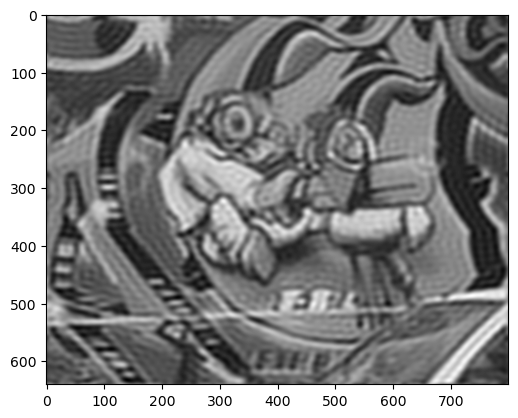

In [21]:
img = cv2.imread('graffiti.png', cv2.IMREAD_GRAYSCALE)
fshift = np.fft.fftshift(np.fft.fft2(img))
magnitude_spectrum = 20*np.log(np.abs(np.sqrt(fshift.real**2 + fshift.imag**2)))#

# Step 6: Apply filtering (e.g., remove low frequencies or high frequencies)
# Create a filter mask (e.g., a low-pass Gaussian filter)
filter_mask = np.zeros(gray_img.shape)
center_x, center_y = gray_img.shape[0] // 2, gray_img.shape[1] // 2
cutoff_radius = 50  # Adjust this value for the desired cutoff frequency
        
# Create a circular mask
for i in range(magnitude_spectrum.shape[0]):
    for j in range(magnitude_spectrum.shape[1]):
        distance = np.sqrt((i - center_x) ** 2 + (j - center_y) ** 2)
        if distance <= cutoff_radius:
            filter_mask[i, j] = 1
        
# Apply the filter mask to the magnitude spectrum
filtered_magnitude_spectrum = fshift * filter_mask
m2 = 20*np.log(np.abs(np.sqrt(filtered_magnitude_spectrum.real**2 + filtered_magnitude_spectrum.imag**2))+1)
filtered_image = np.real(np.fft.ifft2(np.fft.ifftshift(filtered_magnitude_spectrum)))

plt.imshow(filtered_image,cmap="gray")
plt.show()

## Exercise 1.3: SIFT in OpenCV 

In [3]:
cap = cv2.VideoCapture(0)
cv2.namedWindow('Learning from images: SIFT feature visualization')
sift = cv2.SIFT_create()
while True:
    ## read each frame from the camera
    ret,frame=cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    ## convert the frame to gray scale
    gray_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    ## Extract SIFT features
    keypoints,descriptors = sift.detectAndCompute(gray_frame,None)

    ## Draw trhe keypoints of the original frame (for Visualization)
    frame_with_keypoints = cv2.drawKeypoints(frame, keypoints, None, 
                                            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    cv2.imshow('Learning from images: SIFT feature visualization', frame_with_keypoints)

    # Exit the loop when a key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and destroy all windows
cap.release()
cv2.destroyAllWindows()

## Exercise 1.4: Convolution 

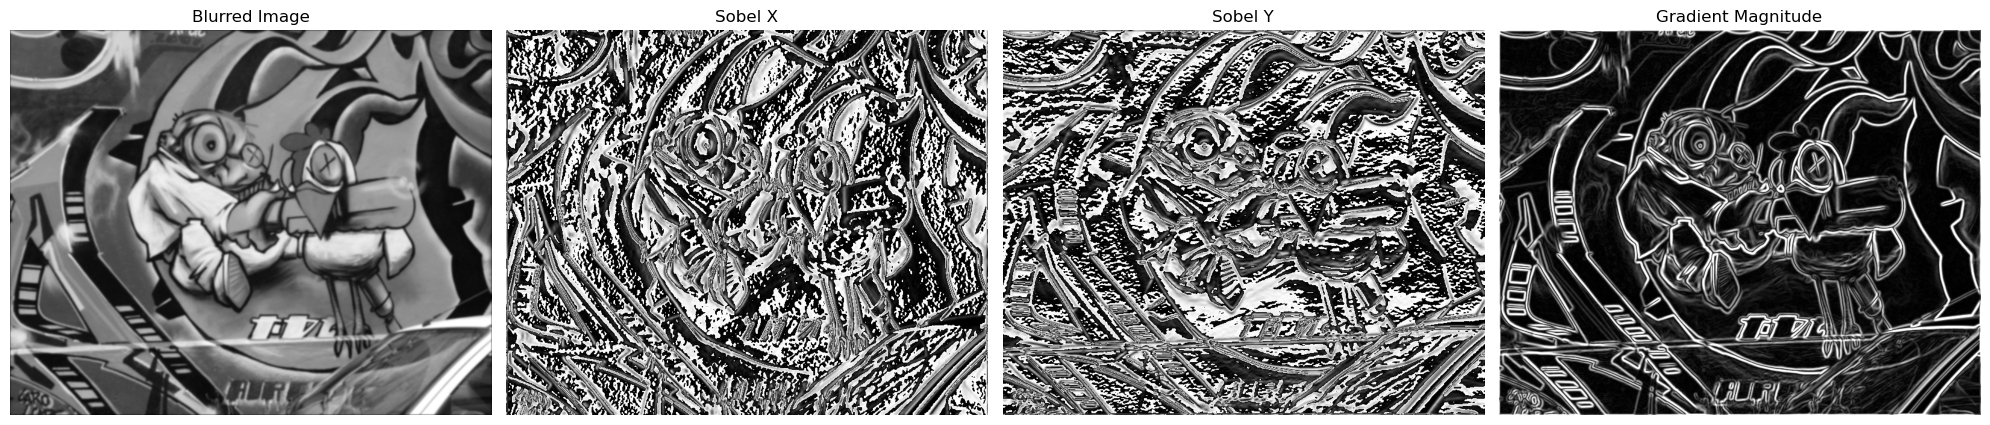

In [10]:
def make_gaussian(size, fwhm = 3, center=None) -> np.ndarray:
    
    x = np.arange(0, size, 1, float) ## x creates a 1D array ranging from 0 to size - 1.
    
    y = x[:,np.newaxis] ## reshapes x into a 2D array (column vector).

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    # The term −4log(2) is a constant that ensures the Gaussian reaches its half-maximum at the specified FWHM.
    k = np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)
    return k / np.sum(k) ## normalization so the sum of normalized values is equal to 1


def convolution_2d(img, kernel) -> np.ndarray:
    
    # offset = int(kernel.shape[0]/2)
    kernel_height,kernel_width=kernel.shape
    offset_y,offset_x=kernel_height//2,kernel_width//2

    ## pad the input iamge to handle borders
    padded_img = np.pad(img,((offset_y, offset_y), (offset_x, offset_x)),mode="constant",constant_values=0)

    ## Initialize output image
    newimg = np.zeros(img.shape)

    ## Convolution Operation
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            ## Element wise multiplication and sum
            newimg[y,x]=np.sum(padded_img[y:y+kernel_height,x:x+kernel_width]*kernel)

    return newimg


if __name__ == "__main__":
    # 1. load image in grayscale
    img = cv2.imread('graffiti.png', cv2.IMREAD_GRAYSCALE)

    # image kernels
    sobelmask_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobelmask_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    gk = make_gaussian(11)

    # 2 use image kernels
    blurred_img = convolution_2d(img, gk)

    # 3. compute gradients using sobel filter
    sobel_x = convolution_2d(blurred_img, sobelmask_x)
    sobel_y = convolution_2d(blurred_img, sobelmask_y)

    # compute magnitude in gradient
    mog = np.sqrt(sobel_x**2 + sobel_y**2)
    mog = np.clip(mog, 0, 255)  # Clip values to [0, 255]
    mog = mog.astype(np.uint8)  # Convert to uint8 for display

    # Plotting the results
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    axs[0].imshow(blurred_img, cmap='gray')  # Display the blurred image
    axs[0].set_title('Blurred Image')
    axs[0].axis('off')  # Hide the axes

    axs[1].imshow(sobel_x.astype(np.uint8), cmap='gray')  # Display Sobel-X
    axs[1].set_title('Sobel X')
    axs[1].axis('off')

    axs[2].imshow(sobel_y.astype(np.uint8), cmap='gray')  # Display Sobel-Y
    axs[2].set_title('Sobel Y')
    axs[2].axis('off')

    axs[3].imshow(mog, cmap='gray')  # Display Magnitude of Gradient (MOG)
    axs[3].set_title('Gradient Magnitude')
    axs[3].axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

## Exercise 2: K-Means for color quantization

random
Iteration 1: Total error 6406515.0, Change rate: nan
Iteration 2: Total error 4872309.0, Change rate: 0.2395
Iteration 3: Total error 4688522.0, Change rate: 0.0377
Iteration 4: Total error 4649423.0, Change rate: 0.0083
Converged


/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_58933/696331648.py:179: RuntimeWarning: invalid value encountered in scalar divide
  change_rate = np.abs(prev_distance - overall_distance) / prev_distance


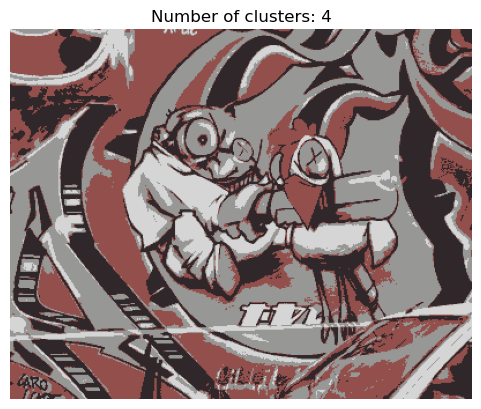

random
Iteration 1: Total error 4232841.5, Change rate: nan
Iteration 2: Total error 3147070.0, Change rate: 0.2565
Iteration 3: Total error 2962961.25, Change rate: 0.0585
Iteration 4: Total error 2921476.25, Change rate: 0.0140
Iteration 5: Total error 2911347.75, Change rate: 0.0035
Converged


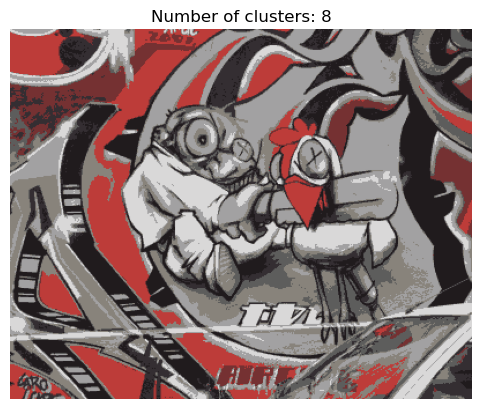

random
Iteration 1: Total error 2775036.75, Change rate: nan
Iteration 2: Total error 2304625.25, Change rate: 0.1695
Iteration 3: Total error 2261444.0, Change rate: 0.0187
Iteration 4: Total error 2246171.5, Change rate: 0.0068
Converged


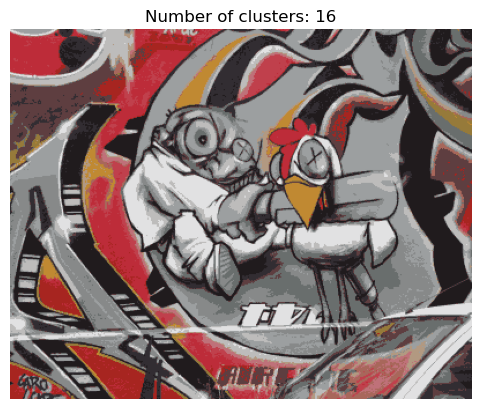

random
Iteration 1: Total error 2143927.75, Change rate: nan
Iteration 2: Total error 1730021.25, Change rate: 0.1931
Iteration 3: Total error 1592954.375, Change rate: 0.0792
Iteration 4: Total error 1563205.5, Change rate: 0.0187
Iteration 5: Total error 1541515.5, Change rate: 0.0139
Iteration 6: Total error 1521010.875, Change rate: 0.0133
Iteration 7: Total error 1511448.625, Change rate: 0.0063
Converged


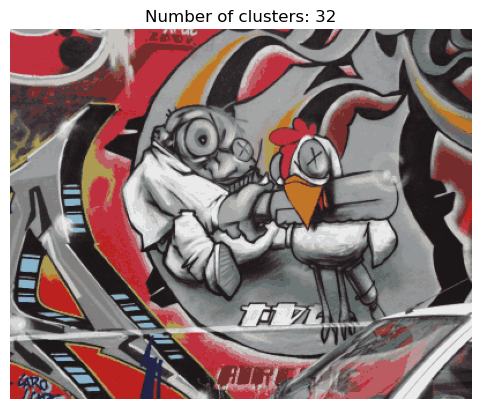

random
Iteration 1: Total error 1645895.75, Change rate: nan
Iteration 2: Total error 1353495.875, Change rate: 0.1777
Iteration 3: Total error 1268618.75, Change rate: 0.0627
Iteration 4: Total error 1242998.75, Change rate: 0.0202
Iteration 5: Total error 1229008.125, Change rate: 0.0113
Iteration 6: Total error 1218646.75, Change rate: 0.0084
Converged


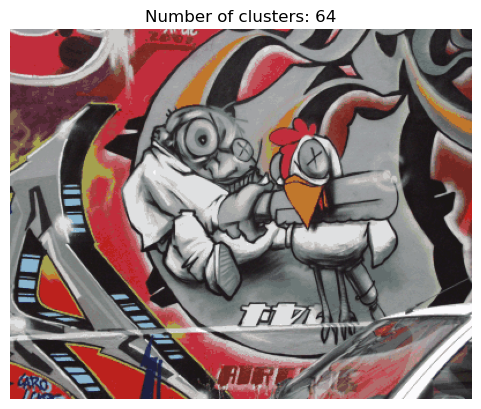

In [24]:
############################################################
#
#                       KMEANS
#
############################################################

# k-means works in 3 steps
# 1. initialize
# 2. assign each data element to current mean (cluster center)
# 3. update mean
# then iterate between 2 and 3 until convergence, i.e. until ~smaller than 5% change rate in the overall distance or cluster centers positions 

def initialize_clusters(img: np.ndarray, num_clusters: int,method="random"):

    ## flatten the image to get list of pixels
    pixels=img.reshape((-1,3))

    if method=="random":
        print("random")
        # Randomly choose num_clusters pixels from the image as initial cluster centers
        random_indices=np.random.choice(pixels.shape[0],num_clusters,replace=False)
        initial_centers=pixels[random_indices]
        
    elif method=="custom":
        print("custom")
       ##  The first cluster center is randomly selected from the pixels.
        initial_centers=[pixels[np.random.choice(pixels.shape[0])]]

        ## select the remaining cluster centers
        for _ in range(1, num_clusters):
            # Calculate the squared distances from the existing cluster centers
            dist_sq = np.min([np.linalg.norm(pixels - center, axis=1)**2 for center in initial_centers], axis=0)
            
            # Choose the next cluster center with a probability proportional to the distance
            prob_dist = dist_sq / np.sum(dist_sq)
            next_center_idx = np.random.choice(pixels.shape[0], p=prob_dist)
            initial_centers.append(pixels[next_center_idx])

        initial_centers = np.array(initial_centers)

    return initial_centers.astype(np.float32)


def assign_clusters(img: np.ndarray, cluster_centers: np.ndarray):

    # compute distances per pixel
    # calculates the difference between each pixel and each cluster center along the RGB channels.
    # computes the Euclidean norm (distance) across the RGB channels for each pixel-center pair. This returns a 2D array distances, 
    # where each element at position (i,j) represents the distance between the i-th pixel and j-th cluster center.

    distances = np.linalg.norm(img_pixels[:,np.newaxis]-cluster_centers,axis=2)

    ## find closest cluster center for each pixel
    ## This step assigns each pixel to the closest cluster based on minimum Euclidean distance.
    closest_clusters = np.argmin(distances,axis=1)

    ## update image with new cluster colors
    ## closest_clusters contains the indices of the closest cluster centers for each pixel.
    updated_img = cluster_centers[closest_clusters].reshape(img.shape)


    ## compute overall distance to print it in each step and see that we minimize here
    overall_distance = np.sum(np.min(distances, axis=1))

    return updated_img.astype(np.uint8), closest_clusters, overall_distance
    


def update_cluster_centers(img: np.ndarray, cluster_assignments: np.ndarray, num_clusters: int):

    ## This reshapes the image, initially in a 3D array format (height, width, 3), into a 2D array img_pixels of shape (total_pixels, 3). 
    ## Each row represents a pixel’s RGB color values, making it easier to process each pixel individually or by cluster
    img_pixels = img.reshape((-1,3))
    # This creates an array new_centers to hold the updated RGB color values for each cluster center. It has shape (num_clusters, 3), 
    # where each row represents the new RGB color (center) for each cluster.
    new_centers = np.zeros((num_clusters,3),dtype=np.float32)

    for i in range(num_clusters):
        ## find all pixels assigned to ith cluster and compute the mean
        assigned_pixels = img_pixels[cluster_assignments==i]
        if len(assigned_pixels)>0:
            ## The axis=0 parameter indicates calculating the mean across the rows (i.e., averaging the RGB channels separately).
            new_centers[i]=np.mean(assigned_pixels,axis=0)

    return new_centers



def kmeans_clustering(img: np.ndarray, num_clusters: int = 3, max_iterations: int = 100, tolerance: float = 0.01,method="random"):

    ## step 1: Initialize the clusters
    cluster_centers = initialize_clusters(img,num_clusters,method=method)
    prev_distance = np.inf ## Track the distance change to check for convergence

    for i in range(max_iterations):
        ## Step 2: Assign Clusters
        updated_img, cluster_assignment,overall_distance = assign_clusters(img,cluster_centers)

        ## Step 3: Updated Cluster Centers
        new_cluster_centers = update_cluster_centers(img, cluster_assignment,num_clusters)

        ## Check for convergence based on tolerance
        change_rate = np.abs(prev_distance - overall_distance) / prev_distance

        print(f"Iteration {i + 1}: Total error {overall_distance}, Change rate: {change_rate:.4f}")

        if change_rate<tolerance:
            print("Converged")
            break

        prev_distance = overall_distance
        cluster_centers=new_cluster_centers

    return updated_img


def load_and_process_image(file_path: str, scaling_factor: float = 0.5):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Note: the scaling helps to do faster computation :) 
    image = cv2.resize(image, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)
    return image

def main():
    file_path = 'graffiti.png'
    img = load_and_process_image(file_path)
    plt.imshow(img)
    plt.title("Original image")
    plt.axis('off')
    for num_clusters in [4, 8, 16, 32, 64]:
        segmented_img = kmeans_clustering(img, num_clusters)

        plt.imshow(segmented_img)
        plt.title(f"Number of clusters: {num_clusters}")
        plt.axis('off')
        plt.show()

if __name__ == "__main__":
    main()


## Cluster Improvement: Using K mean ++ Initialization

custom
Iteration 1: Total error 5822262.0, Change rate: nan
Iteration 2: Total error 5511539.0, Change rate: 0.0534
Iteration 3: Total error 5463144.0, Change rate: 0.0088
Converged


/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_58933/696331648.py:179: RuntimeWarning: invalid value encountered in scalar divide
  change_rate = np.abs(prev_distance - overall_distance) / prev_distance


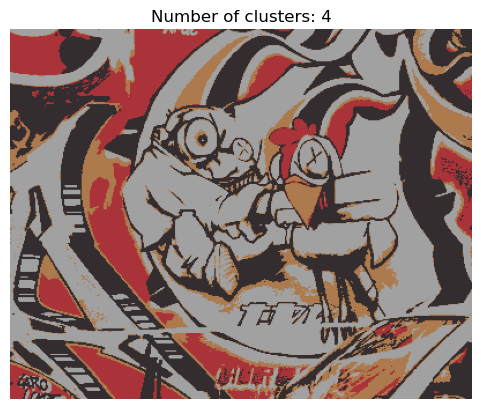

custom
Iteration 1: Total error 5040520.0, Change rate: nan
Iteration 2: Total error 3447415.25, Change rate: 0.3161
Iteration 3: Total error 2991842.0, Change rate: 0.1321
Iteration 4: Total error 2889616.0, Change rate: 0.0342
Iteration 5: Total error 2865143.25, Change rate: 0.0085
Converged


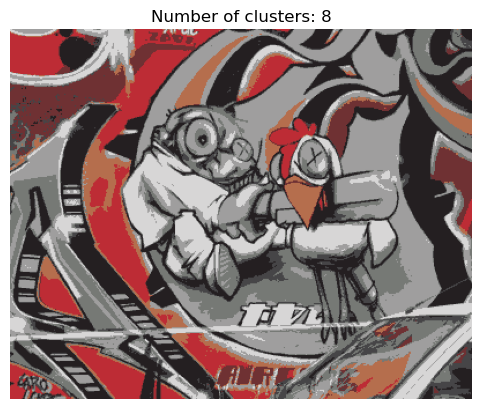

custom
Iteration 1: Total error 3329802.75, Change rate: nan
Iteration 2: Total error 2284879.75, Change rate: 0.3138
Iteration 3: Total error 2186662.0, Change rate: 0.0430
Iteration 4: Total error 2138862.75, Change rate: 0.0219
Iteration 5: Total error 2109129.75, Change rate: 0.0139
Iteration 6: Total error 2092102.375, Change rate: 0.0081
Converged


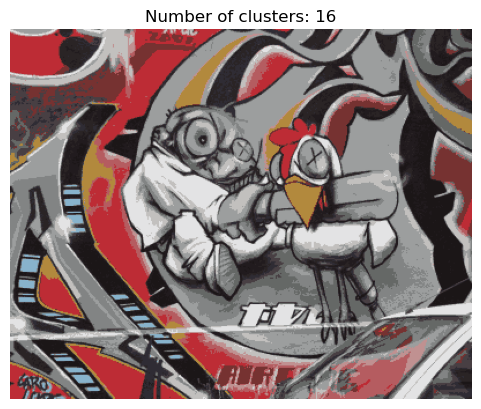

custom
Iteration 1: Total error 2294690.5, Change rate: nan
Iteration 2: Total error 1716151.75, Change rate: 0.2521
Iteration 3: Total error 1631339.125, Change rate: 0.0494
Iteration 4: Total error 1598866.25, Change rate: 0.0199
Iteration 5: Total error 1579473.25, Change rate: 0.0121
Iteration 6: Total error 1563349.0, Change rate: 0.0102
Iteration 7: Total error 1550351.25, Change rate: 0.0083
Converged


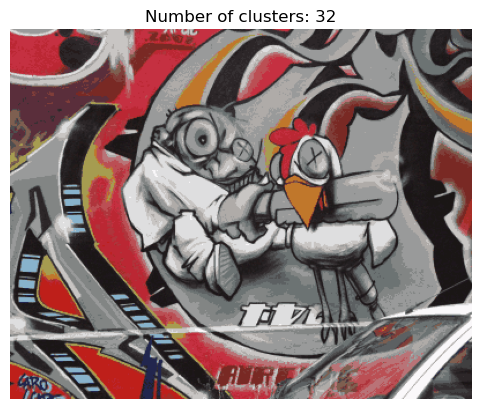

custom
Iteration 1: Total error 1856252.25, Change rate: nan
Iteration 2: Total error 1373155.0, Change rate: 0.2603
Iteration 3: Total error 1273531.875, Change rate: 0.0726
Iteration 4: Total error 1234293.125, Change rate: 0.0308
Iteration 5: Total error 1212885.125, Change rate: 0.0173
Iteration 6: Total error 1200003.625, Change rate: 0.0106
Iteration 7: Total error 1190295.75, Change rate: 0.0081
Converged


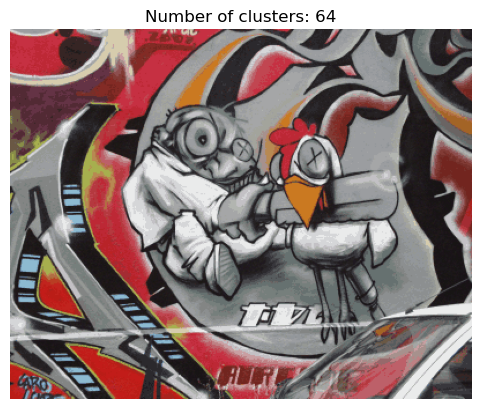

In [25]:
def main():
    file_path = 'graffiti.png'
    img = load_and_process_image(file_path)
    plt.imshow(img)
    plt.title("Original image")
    plt.axis('off')
    for num_clusters in [4, 8, 16, 32, 64]:
        segmented_img = kmeans_clustering(img, num_clusters,method="custom")

        plt.imshow(segmented_img)
        plt.title(f"Number of clusters: {num_clusters}")
        plt.axis('off')
        plt.show()

if __name__ == "__main__":
    main()


Using K means ++ initialiozation improves the clustering because we can see better result with less number of clusters like 4 and 16 comparing to random initialization.    